Part 1 - Write a program to read in the data from the ca-netscience.mis file using your preferred language.
Part 2 - Find the shortest path in the graph and try the test case. Then answer Question 1 to see if your program gives you the correct answer. 
Part 3 - Write a program to calculate the edge betweenness in a graph. Then answer Questions 2 to 4. 
Part 4 - Remove the edges with the highest betweenness and run your program on the given data sets to find out the first level clusters.

In [152]:
import networkx as nx
import matplotlib.pyplot as plt


def generate_graph(file_path):
  G = nx.Graph()
  with open(file_path, 'r') as file:
    file = file.read().split('\n')[:-1]
    _, _, nodes, edges = file.pop(0).split()
    for line in file:
      _, n1, n2 = line.split()
      G.add_nodes_from([n1, n2])
      G.add_edge(n1, n2)
  print(f'Nodes: {nodes}/{G.number_of_nodes()}')
  print(f'Edges: {edges}/{G.number_of_edges()}')
  return G


def plot_graph(G, **kwargs):
  plt.figure(figsize=(16,8))
  plt.subplot(121)
  nx.draw(G, **kwargs)
  plt.subplot(122)
  nx.draw_shell(G, **kwargs)

Nodes: 34/34
Edges: 78/78


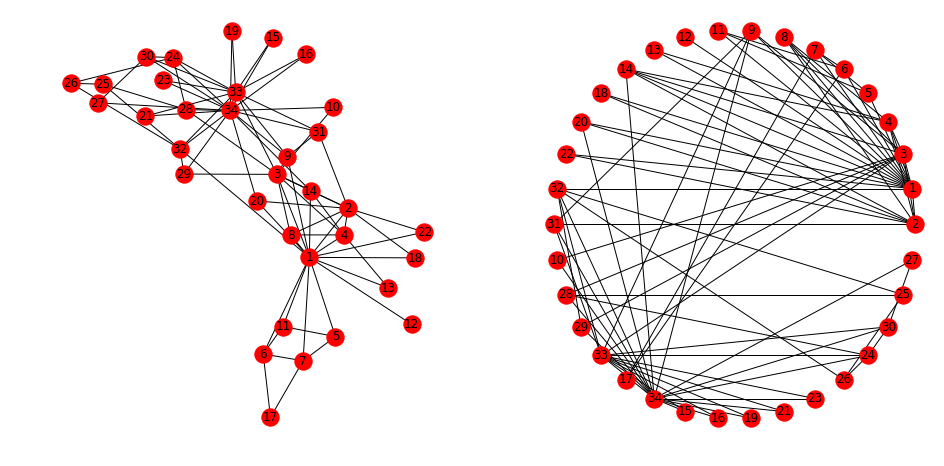

In [153]:
G = generate_graph('soc-karate.txt')
plot_graph(G, with_labels=True)

In [149]:
connections = list(G.degree())
connections.sort(key=lambda x: x[1], reverse=True)
print(connections)

[('34', 17), ('1', 16), ('33', 12), ('3', 10), ('2', 9), ('4', 6), ('32', 6), ('9', 5), ('14', 5), ('24', 5), ('6', 4), ('7', 4), ('8', 4), ('31', 4), ('28', 4), ('30', 4), ('5', 3), ('11', 3), ('20', 3), ('29', 3), ('26', 3), ('25', 3), ('13', 2), ('18', 2), ('22', 2), ('10', 2), ('17', 2), ('15', 2), ('16', 2), ('19', 2), ('21', 2), ('23', 2), ('27', 2), ('12', 1)]


Nodes: 379/379
Edges: 914/914


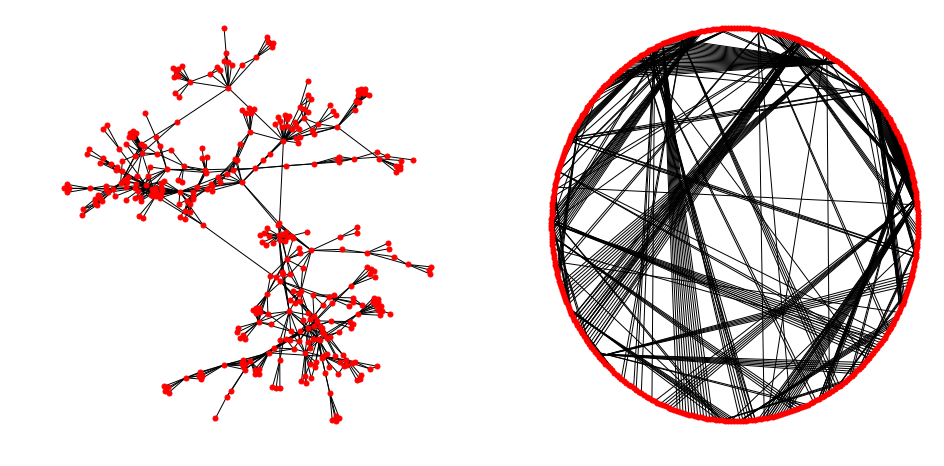

In [150]:
G = generate_graph('ca-netscience.txt')
plot_graph(G, with_labels=False, node_size=25)

In [151]:
connections = list(G.degree())
connections.sort(key=lambda x: x[1], reverse=True)
print(connections[:3])

[('4', 34), ('5', 27), ('26', 27)]


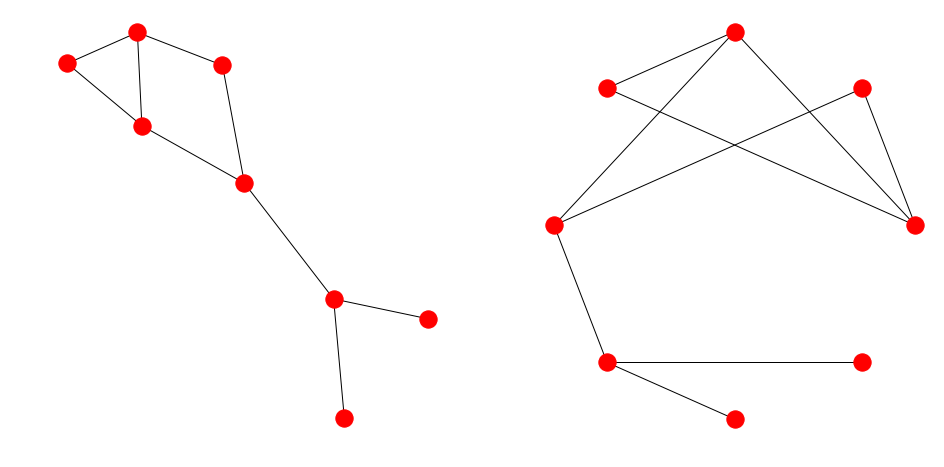

In [154]:
test_nodes = [
  ('A', 'B'),
  ('A', 'E'),
  ('A', 'C'),
  ('C', 'E'),
  ('E', 'D'),
  ('D', 'B'),
  ('D', 'F'),
  ('F', 'G'),
  ('F', 'H')
]

G = nx.Graph()
for n1, n2 in test_nodes:
  G.add_nodes_from([n1, n2])
  G.add_edge(n1, n2)
plot_graph(G)

In [155]:
nx.shortest_path(G, 'A', 'H')

['A', 'E', 'D', 'F', 'H']

In [161]:
nx.algorithms.bipartite.centrality.betweenness_centrality(G, ('D', 'F'))

{'A': 0.125,
 'B': 0.16666666666666666,
 'E': 0.5,
 'C': 0.0,
 'D': 0.625,
 'F': 0.55,
 'G': 0.0,
 'H': 0.0}

In [164]:
nx.algorithms.bipartite.closeness_centrality(G, ('D', 'F'))

NodeNotFound: Source ('D', 'F') is not in G